In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [245]:
df = pd.read_csv('./dataset/job/job_skills.csv')
df

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...
...,...,...,...,...,...,...,...
1245,Google,Global Investigator,Real Estate & Workplace Services,"Boulder, CO, United States",Develop protocols and practices to assess and ...,BA/BS degree or equivalent practical experienc...,Investigative or Interview certification throu...
1246,Google,Campus Security Manager,Real Estate & Workplace Services,"Boulder, CO, United States",Manage the daily operations of the security ve...,BA/BS degree or equivalent practical experienc...,Master’s degree.\nProficient in the use of com...
1247,Google,Facilities Manager,Real Estate & Workplace Services,"Xinyi District, Taiwan",Collaborate with functional teams; plan and ma...,BA/BS degree or equivalent practical experienc...,Experience managing outsourced facilities serv...
1248,Google,Physical Security Manager,Real Estate & Workplace Services,"Tel Aviv-Yafo, Israel",Partner closely with and offer guidance and co...,BA/BS degree or equivalent practical experienc...,Experience working on international programs.\...


In [246]:
df.isna().sum()

Company                      0
Title                        0
Category                     0
Location                     0
Responsibilities            15
Minimum Qualifications      14
Preferred Qualifications    14
dtype: int64

In [247]:
df.dropna(inplace=True)

In [248]:
df.isna().sum()

Company                     0
Title                       0
Category                    0
Location                    0
Responsibilities            0
Minimum Qualifications      0
Preferred Qualifications    0
dtype: int64

In [249]:
print(df.loc[0]['Title'])
print("===Minimum qualifications===")
print(df.loc[0]['Minimum Qualifications'])
print("===Preferred qualifications===")
print(df.loc[0]['Preferred Qualifications'])

Google Cloud Program Manager
===Minimum qualifications===
BA/BS degree or equivalent practical experience.
3 years of experience in program and/or project management in cloud computing, enterprise software and/or marketing technologies.
===Preferred qualifications===
Experience in the business technology market as a program manager in SaaS, cloud computing, and/or emerging technologies.
Significant cross-functional experience across engineering, sales, and marketing teams in cloud computing or related technical fields.
Proven successful program outcomes from idea to launch in multiple contexts throughout your career.
Ability to manage the expectations, demands and priorities of multiple internal stakeholders based on overarching vision and success for global team health.
Ability to work under pressure and possess flexibility with changing needs and direction in a rapidly-growing organization.
Strong organization and communication skills.


In [250]:
df['Qualifications'] = df['Minimum Qualifications'] + ' ' + df['Preferred Qualifications']

In [251]:
df['Qualifications']

0       BA/BS degree or equivalent practical experienc...
1       BS degree in an Engineering discipline or equi...
2       Bachelor’s degree in Business, Economics, Stat...
3       BA/BS degree in Computer Science or equivalent...
4       BA/BS degree or equivalent practical experienc...
                              ...                        
1245    BA/BS degree or equivalent practical experienc...
1246    BA/BS degree or equivalent practical experienc...
1247    BA/BS degree or equivalent practical experienc...
1248    BA/BS degree or equivalent practical experienc...
1249    BA/BS degree or equivalent practical experienc...
Name: Qualifications, Length: 1235, dtype: object

In [252]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

In [253]:
# x_test, x_train, y_test, y_train = train_test_split(df['Qualifications'], df['Category'], test_size=.2)

In [254]:
modelA = make_pipeline(TfidfVectorizer(), MultinomialNB())
modelB = make_pipeline(TfidfVectorizer(), LogisticRegression())
modelC = make_pipeline(TfidfVectorizer(), DecisionTreeClassifier())

In [255]:
modelA.fit(df['Qualifications'], df['Category'])
modelB.fit(df['Qualifications'], df['Category'])
modelC.fit(df['Qualifications'], df['Category'])

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                                 vocabulary=None)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, 

In [256]:
from sklearn.metrics import accuracy_score
print(accuracy_score(df['Category'], modelA.predict(df['Qualifications'])))
print(accuracy_score(df['Category'], modelB.predict(df['Qualifications'])))
print(accuracy_score(df['Category'], modelC.predict(df['Qualifications'])))

0.6016194331983805
0.8558704453441296
0.9983805668016195


In [257]:
df['Category_Predict_A'] = modelA.predict(df['Qualifications'])
df['Category_Predict_B'] = modelB.predict(df['Qualifications'])
df['Category_Predict_C'] = modelC.predict(df['Qualifications'])

In [258]:
shapeA=df[df['Category'] == df['Category_Predict_A']].shape
shapeB=df[df['Category'] == df['Category_Predict_B']].shape
shapeC=df[df['Category'] == df['Category_Predict_C']].shape

In [259]:
df.shape

(1235, 11)

In [260]:
print("accuracy A", (shapeA[0]/df.shape[0])*100)
print("accuracy B", (shapeB[0]/df.shape[0])*100)
print("accuracy C", (shapeC[0]/df.shape[0])*100)

accuracy A 60.16194331983805
accuracy B 85.58704453441295
accuracy C 99.83805668016194


In [261]:
shapeC

(1233, 11)

In [262]:
df[['Category', 'Category_Predict_C']]

,Category,Category_Predict_C
0,Program Management,Program Management
1,Manufacturing & Supply Chain,Manufacturing & Supply Chain
2,Technical Solutions,Technical Solutions
3,Developer Relations,Developer Relations
4,Program Management,Program Management
...,...,...
1245,Real Estate & Workplace Services,Real Estate & Workplace Services
1246,Real Estate & Workplace Services,Real Estate & Workplace Services
1247,Real Estate & Workplace Services,Real Estate & Workplace Services
1248,Real Estate & Workplace Services,Real Estate & Workplace Services


In [263]:
df['Company'].value_counts()

Google     1212
YouTube      23
Name: Company, dtype: int64

In [264]:
import seaborn as sns

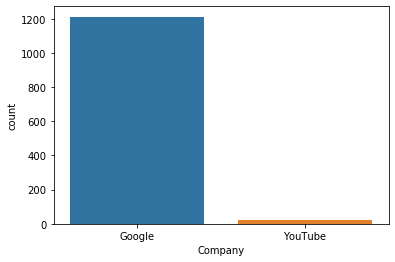

In [265]:
sns.countplot(df['Company'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

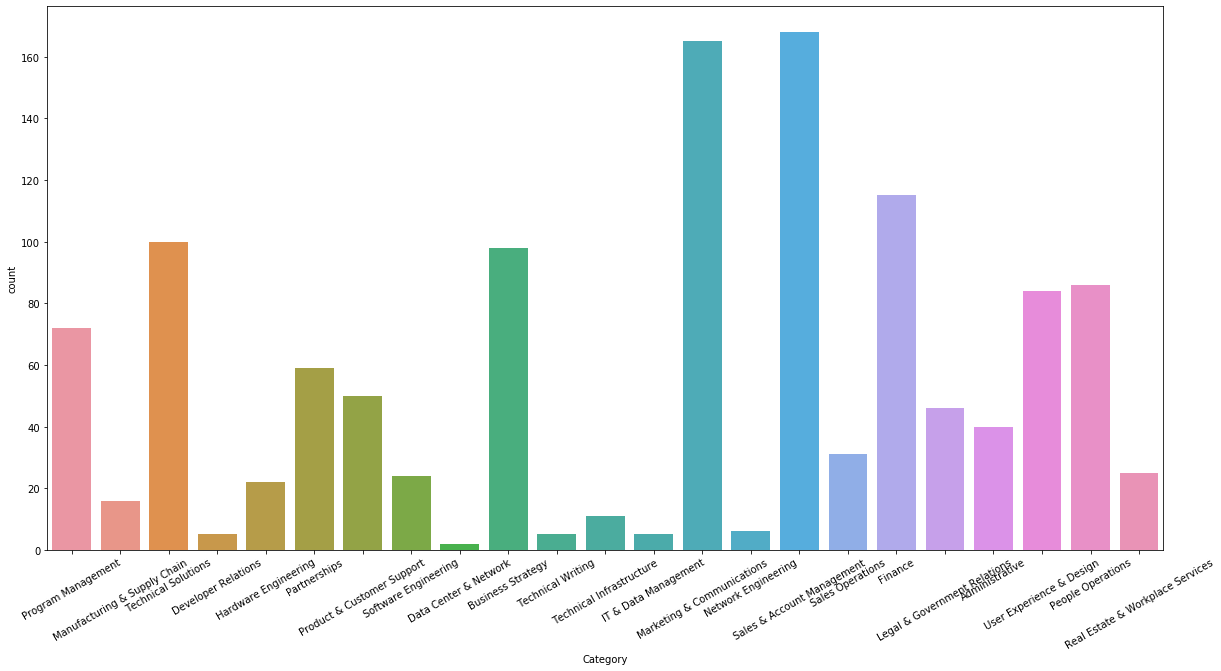

In [266]:
plt.figure(figsize=(20,10))
sns.countplot(df['Category'])
plt.xticks(rotation=30)

In [275]:
modelC.predict(['machine learning'])

array(['Software Engineering'], dtype=object)

In [286]:
modelA.predict(['BA degree in computer science, cloud computing, machine learning, big data'])

array(['Technical Solutions'], dtype='<U32')

In [274]:
df[(df['Category'] == 'Software Engineering') & df['Qualifications'].str.contains("Machine Learning")]['Qualifications'].values

array(["BA/BS degree in Computer Science or other related field, or equivalent practical experience.\nExperience in one or more of the following programming languages: Java, C++ and/or Python.\nExperience in engineering in a technical lead and/or managerial capacity. Master's degree or PhD in Computer Science, Artificial Intelligence, Machine Learning or related technical field.\nExperience in technical leadership and people management (managing teams of developers).\nExperience managing in a test-driven development environment, and dealing with code refactoring and code bottleneck issues.\nExperience in front-end, web testing infrastructure, distributed systems and architecture.\nExperience in building test automation frameworks and tools for scalable serving components.",
       '5 years of experience with systems software design.\nExperience with one or more of the following areas: Server Backend Distributed and Parallel Systems, Full Stack Development (front end and backend), Scala

In [285]:
print(df[(df['Category'] == 'Technical Solutions') & df['Qualifications'].str.contains("Machine Learning")]['Qualifications'].iloc[0])

BA/BS degree in Computer Science or a related software engineering field, or equivalent practical experience.
Experience across cloud computing (infrastructure, storage, platforms and data), as well as cloud market, competitive dynamics and customer buying behavior.
Experience working with technologies in the Machine Learning/Big Data ecosystem.
Ability to speak and write in English fluently and idiomatically. Master's degree in Computer Science or a related technical technical field.
Experience writing code for Machine Learning purposes. Experience with Big Data and Platform/Infrastructure-as-a-Service (PaaS/IaaS) technologies.
Ability to advise customers on how to collect data for a given problem, clean it, visualize it, extract features from it and choose the right type of learning algorithm.
Ability to explain and demystify relevant techniques to those who are new to Machine Learning, with the ability to advise customers on making tradeoffs.
Ability to quickly learn, understand, an